**DATA** **CHECKING**

In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
##

In [7]:
# dataset reading
data = pd.read_csv('fifa_ranking.csv')
data1 = pd.read_csv('results.csv')

In [8]:
data.rename(columns= {'country_full':'country'}, inplace = True)

In [9]:
# unnecessary column dropping
to_drop = ['country_abrv', 'rank_date']
data.drop(to_drop, axis=1, inplace=True)

In [10]:
data.columns

Index(['rank', 'country', 'total_points', 'previous_points', 'rank_change',
       'cur_year_avg', 'cur_year_avg_weighted', 'last_year_avg',
       'last_year_avg_weighted', 'two_year_ago_avg', 'two_year_ago_weighted',
       'three_year_ago_avg', 'three_year_ago_weighted', 'confederation'],
      dtype='object')

In [11]:
data.shape

(57793, 14)

In [12]:
# checking duplicates
data.duplicated().any()

True

In [13]:
# dropping all duplicates
data.drop_duplicates(inplace=True)

In [14]:
# checking null values
data.isnull().any()

rank                       False
country                    False
total_points               False
previous_points            False
rank_change                False
cur_year_avg               False
cur_year_avg_weighted      False
last_year_avg              False
last_year_avg_weighted     False
two_year_ago_avg           False
two_year_ago_weighted      False
three_year_ago_avg         False
three_year_ago_weighted    False
confederation              False
dtype: bool

In [15]:
# checking duplicates
data1.duplicated().any()

False

In [16]:
# checking null values
data1.isnull().any()

date          False
home_team     False
away_team     False
home_score    False
away_score    False
tournament    False
city          False
country       False
neutral       False
dtype: bool

In [17]:
# dataset merging
frames = [data, data1]
df = pd.concat(frames)
df

,rank,country,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,...,three_year_ago_weighted,confederation,date,home_team,away_team,home_score,away_score,tournament,city,neutral
0,1.0,Germany,0.0,57.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,UEFA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,Italy,0.0,57.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,UEFA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,Switzerland,0.0,50.0,9.0,0.0,0.0,0.0,0.0,0.0,...,0.0,UEFA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,Sweden,0.0,55.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,UEFA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,Argentina,0.0,51.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,CONMEBOL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40834,NaN,Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2019-07-18,American Samoa,Tahiti,8.0,1.0,Pacific Games,Apia,True
40835,NaN,Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2019-07-18,Fiji,Solomon Islands,4.0,4.0,Pacific Games,Apia,True
40836,NaN,Egypt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2019-07-19,Senegal,Algeria,0.0,1.0,African Cup of Nations,Cairo,True
40837,NaN,India,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2019-07-19,Tajikistan,North Korea,0.0,1.0,Intercontinental Cup,Ahmedabad,True


In [18]:
df.head()

,rank,country,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,...,three_year_ago_weighted,confederation,date,home_team,away_team,home_score,away_score,tournament,city,neutral
0,1.0,Germany,0.0,57.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,UEFA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,Italy,0.0,57.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,UEFA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,Switzerland,0.0,50.0,9.0,0.0,0.0,0.0,0.0,0.0,...,0.0,UEFA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,Sweden,0.0,55.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,UEFA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,Argentina,0.0,51.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,CONMEBOL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
df.isnull().any()

rank                        True
country                    False
total_points                True
previous_points             True
rank_change                 True
cur_year_avg                True
cur_year_avg_weighted       True
last_year_avg               True
last_year_avg_weighted      True
two_year_ago_avg            True
two_year_ago_weighted       True
three_year_ago_avg          True
three_year_ago_weighted     True
confederation               True
date                        True
home_team                   True
away_team                   True
home_score                  True
away_score                  True
tournament                  True
city                        True
neutral                     True
dtype: bool

In [20]:
# shape of the dataset
df.shape

(95228, 22)

In [21]:
# column readings
df.columns

Index(['rank', 'country', 'total_points', 'previous_points', 'rank_change',
       'cur_year_avg', 'cur_year_avg_weighted', 'last_year_avg',
       'last_year_avg_weighted', 'two_year_ago_avg', 'two_year_ago_weighted',
       'three_year_ago_avg', 'three_year_ago_weighted', 'confederation',
       'date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'neutral'],
      dtype='object')

In [22]:
#shape of the dataset
df.shape

(95228, 22)

In [23]:
# dataset preview
df.head()

,rank,country,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,...,three_year_ago_weighted,confederation,date,home_team,away_team,home_score,away_score,tournament,city,neutral
0,1.0,Germany,0.0,57.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,UEFA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,Italy,0.0,57.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,UEFA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,Switzerland,0.0,50.0,9.0,0.0,0.0,0.0,0.0,0.0,...,0.0,UEFA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,Sweden,0.0,55.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,UEFA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,Argentina,0.0,51.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,CONMEBOL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
df.tail()

,rank,country,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,...,three_year_ago_weighted,confederation,date,home_team,away_team,home_score,away_score,tournament,city,neutral
40834,NaN,Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2019-07-18,American Samoa,Tahiti,8.0,1.0,Pacific Games,Apia,True
40835,NaN,Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2019-07-18,Fiji,Solomon Islands,4.0,4.0,Pacific Games,Apia,True
40836,NaN,Egypt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2019-07-19,Senegal,Algeria,0.0,1.0,African Cup of Nations,Cairo,True
40837,NaN,India,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2019-07-19,Tajikistan,North Korea,0.0,1.0,Intercontinental Cup,Ahmedabad,True
40838,NaN,Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2019-07-20,Papua New Guinea,Fiji,1.0,1.0,Pacific Games,Apia,True


In [25]:
df.sample(7)

,rank,country,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,...,three_year_ago_weighted,confederation,date,home_team,away_team,home_score,away_score,tournament,city,neutral
8705,NaN,Kenya,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1973-08-19,Kenya,Zambia,2.0,2.0,FIFA World Cup qualification,Nairobi,False
34126,NaN,Cape Verde,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2012-06-09,Cape Verde,Tunisia,1.0,2.0,FIFA World Cup qualification,Praia,False
32226,NaN,Saudi Arabia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2010-08-11,Saudi Arabia,Togo,1.0,0.0,Friendly,Riyadh,False
30103,79.0,Iraq,0.0,402.0,-1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,AFC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31687,NaN,Zimbabwe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2009-10-21,Mauritius,Lesotho,0.0,1.0,COSAFA Cup,Harare,True
26879,NaN,Ivory Coast,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2004-09-05,Ivory Coast,Sudan,5.0,0.0,FIFA World Cup qualification,Abidjan,False
16714,188.0,Nicaragua,0.0,89.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,CONCACAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
# checking datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95228 entries, 0 to 40838
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     54389 non-null  float64
 1   country                  95228 non-null  object 
 2   total_points             54389 non-null  float64
 3   previous_points          54389 non-null  float64
 4   rank_change              54389 non-null  float64
 5   cur_year_avg             54389 non-null  float64
 6   cur_year_avg_weighted    54389 non-null  float64
 7   last_year_avg            54389 non-null  float64
 8   last_year_avg_weighted   54389 non-null  float64
 9   two_year_ago_avg         54389 non-null  float64
 10  two_year_ago_weighted    54389 non-null  float64
 11  three_year_ago_avg       54389 non-null  float64
 12  three_year_ago_weighted  54389 non-null  float64
 13  confederation            54389 non-null  object 
 14  date                  

In [27]:
# checking duplicates
df.duplicated().any()

False

In [28]:
# dropping all duplicates
df.drop_duplicates(inplace=True)

In [29]:
# checking null values
df.isnull().any()

rank                        True
country                    False
total_points                True
previous_points             True
rank_change                 True
cur_year_avg                True
cur_year_avg_weighted       True
last_year_avg               True
last_year_avg_weighted      True
two_year_ago_avg            True
two_year_ago_weighted       True
three_year_ago_avg          True
three_year_ago_weighted     True
confederation               True
date                        True
home_team                   True
away_team                   True
home_score                  True
away_score                  True
tournament                  True
city                        True
neutral                     True
dtype: bool

In [31]:
# fill null values with zero
df.fillna(0, inplace=True)

In [32]:
# Handling Missing Data
df.isnull().sum()

rank                       0
country                    0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
date                       0
home_team                  0
away_team                  0
home_score                 0
away_score                 0
tournament                 0
city                       0
neutral                    0
dtype: int64

In [33]:
# Handling outliers
# quantiles
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Removing outliers based on IQR range and storing the result in the data frame 'df_out'
# ---
# 
df1 = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Printing shape of new dataset
# ---
# 
print(df1.shape)

# Printing shape of old dataset
# ---
#
print(df.shape)

(34520, 22)
(95228, 22)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  # Remove the CWD from sys.path while we load stuff.


In [34]:
# top football confederations
print('Total number of confederations: {0}'.format(df1['confederation'].nunique()))
print(df1['confederation'].value_counts().head(10))
print('--'*40)

Total number of confederations: 7
0           26356
CAF          2054
UEFA         2035
AFC          1759
CONCACAF     1434
OFC           470
CONMEBOL      412
Name: confederation, dtype: int64
--------------------------------------------------------------------------------


**EXPLORATORY** **DATA** **ANALYSIS**

***Univariate*** ***Analysis***

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Distribution of countries homescores')

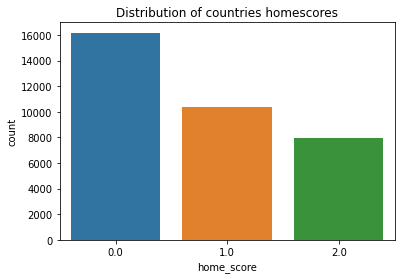

In [36]:
#A histogram of home scores of different countries
ax = sns.countplot(df1['home_score'], order = df1['home_score'].value_counts().index)
plt.title('Distribution of countries homescores')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


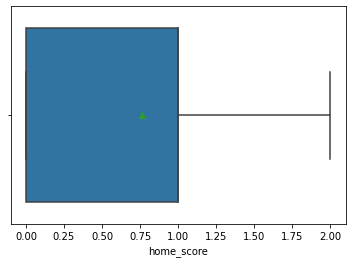

In [37]:
## boxplot
sns.boxplot(df1['home_score'], showmeans=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


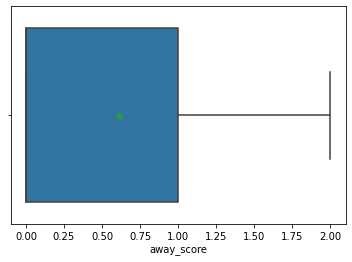

In [38]:
sns.boxplot(df1['away_score'], showmeans=True)

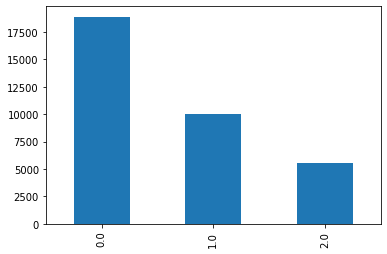

In [40]:
df1['away_score'].value_counts().sort_index().plot.bar()

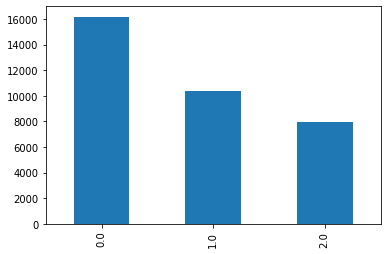

In [41]:
df1['home_score'].value_counts().sort_index().plot.bar()

In [42]:
print(df1.skew())

rank                       2.033130
total_points               0.000000
previous_points            2.654479
rank_change                0.000000
cur_year_avg               0.000000
cur_year_avg_weighted      0.000000
last_year_avg              0.000000
last_year_avg_weighted     0.000000
two_year_ago_avg           0.000000
two_year_ago_weighted      0.000000
three_year_ago_avg         0.000000
three_year_ago_weighted    0.000000
home_score                 0.454146
away_score                 0.761499
neutral                    1.599769
dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [43]:
print(df1.kurt())

rank                       2.643261
total_points               0.000000
previous_points            6.012138
rank_change                0.000000
cur_year_avg               0.000000
cur_year_avg_weighted      0.000000
last_year_avg              0.000000
last_year_avg_weighted     0.000000
two_year_ago_avg           0.000000
two_year_ago_weighted      0.000000
three_year_ago_avg         0.000000
three_year_ago_weighted    0.000000
home_score                -1.304573
away_score                -0.833384
neutral                    0.559292
dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [44]:
df1.columns

Index(['rank', 'country', 'total_points', 'previous_points', 'rank_change',
       'cur_year_avg', 'cur_year_avg_weighted', 'last_year_avg',
       'last_year_avg_weighted', 'two_year_ago_avg', 'two_year_ago_weighted',
       'three_year_ago_avg', 'three_year_ago_weighted', 'confederation',
       'date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'neutral'],
      dtype='object')

In [45]:
to_drop = ['rank_change',
       'cur_year_avg', 'cur_year_avg_weighted', 'last_year_avg',
       'last_year_avg_weighted', 'two_year_ago_avg', 'two_year_ago_weighted',
       'three_year_ago_avg', 'three_year_ago_weighted']
df1.drop(to_drop, axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [46]:
df1.shape

(34520, 13)

In [52]:
# Calculating the pearson coefficient
pearson_coeff = df1["home_score"].corr(df1["away_score"], method="pearson") 
print(pearson_coeff)

# Checking whether you have to define the pearson
coeff = df1["home_score"].corr(df1["away_score"])
print(coeff)

0.23873779888274616
0.23873779888274616


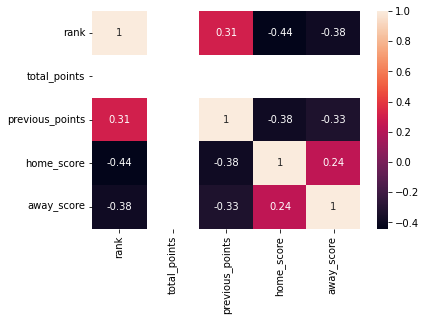

In [53]:
# heatmap
sns.heatmap(df1.corr(),annot=True)
plt.show()

In [54]:
df1.sample(6)

,rank,country,total_points,previous_points,confederation,date,home_team,away_team,home_score,away_score,tournament,city,neutral
31679,201.0,American Samoa,0.0,0.0,OFC,0,0,0,0.0,0.0,0,0,0
7311,0.0,Mozambique,0.0,0.0,0,1969-11-23,Zimbabwe,Australia,1.0,1.0,FIFA World Cup qualification,Maputo,True
10901,0.0,Madagascar,0.0,0.0,0,1979-08-01,Madagascar,Tanzania,1.0,0.0,Friendly,Antananarivo,False
28833,0.0,Ethiopia,0.0,0.0,0,2006-12-01,Ethiopia,Malawi,1.0,0.0,CECAFA Cup,Addis Abeba,False
1202,0.0,Netherlands,0.0,0.0,0,1929-06-04,Netherlands,Scotland,0.0,2.0,Friendly,Amsterdam,False
33490,0.0,Peru,0.0,0.0,0,2011-10-07,Peru,Paraguay,2.0,0.0,FIFA World Cup qualification,Lima,False


In [55]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34520 entries, 0 to 40838
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rank             34520 non-null  float64
 1   country          34520 non-null  object 
 2   total_points     34520 non-null  float64
 3   previous_points  34520 non-null  float64
 4   confederation    34520 non-null  object 
 5   date             34520 non-null  object 
 6   home_team        34520 non-null  object 
 7   away_team        34520 non-null  object 
 8   home_score       34520 non-null  float64
 9   away_score       34520 non-null  float64
 10  tournament       34520 non-null  object 
 11  city             34520 non-null  object 
 12  neutral          34520 non-null  object 
dtypes: float64(5), object(8)
memory usage: 4.7+ MB


In [56]:
df1['home_score'].corr(df1['away_score'])

0.23873779888274616

**Factor** **Analysis**

In [58]:
# Installing factor analyzer 
!pip install factor_analyzer==0.2.3
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value, p_value

#The p vlaue is 0 the observed matrix is not an identity matrix.

/usr/local/lib/python3.7/dist-packages/factor_analyzer/factor_analyzer.py:188: RuntimeWarning: invalid value encountered in log
  statistic = -np.log(corr_det) * (n - 1 - (2 * p + 5) / 6)


(nan, nan)

**Principal** **Component** **Analysis**

In [59]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df1[['home_score','away_score']])
scaled_data = scaler.transform(df1[['home_score','away_score']])

In [60]:
scaled_data = pd.DataFrame(scaled_data)

In [61]:
df2 = scaled_data.fillna(0)
df2.head()

,0,1
0,-0.950755,-0.821526
1,-0.950755,-0.821526
2,-0.950755,-0.821526
3,-0.950755,-0.821526
4,-0.950755,-0.821526


In [62]:
from sklearn.decomposition import PCA
logmodel = PCA(n_components=2)
logmodel.fit(df2)
pca_x = logmodel.transform(df2)

In [63]:
pca_x.shape

(34520, 2)

In [64]:
df3 = pd.DataFrame(logmodel.components_, columns = ['home_score','away_score'])

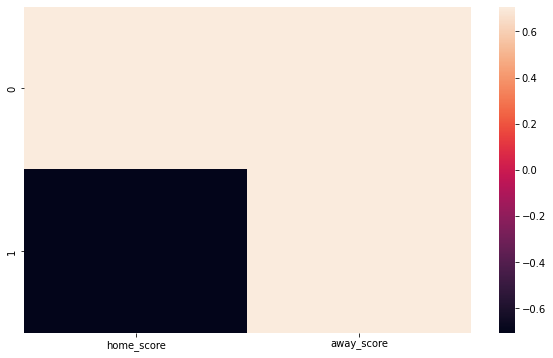

In [65]:
plt.figure(figsize=(10,6))
sns.heatmap(df3)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'First Principle Component ')

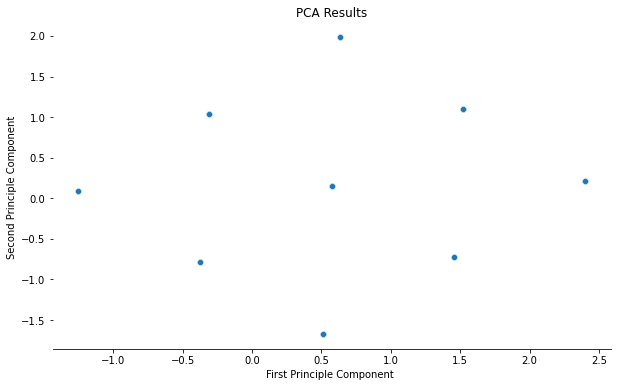

In [66]:
plt.figure(figsize=(10,6))
ty=sns.scatterplot(pca_x[:,0], pca_x[:,1])
sns.despine(left=True)
ty.set_title('PCA Results')
ty.set_ylabel('Second Principle Component ')
ty.set_xlabel('First Principle Component ')

In [67]:
pca_x

array([[-1.25319172,  0.0913784 ],
       [-1.25319172,  0.0913784 ],
       [-1.25319172,  0.0913784 ],
       ...,
       [-0.3083254 ,  1.03624472],
       [-0.3083254 ,  1.03624472],
       [ 0.57347718,  0.15444214]])

**Polynomial** **Regression** **Analysis**

In [68]:
#Import libaries
import datetime
import operator
import matplotlib.pyplot as plt
from ipywidgets import interact
from IPython.display import Markdown as md
from datetime import date, timedelta, datetime
from numpy import sqrt
from pandas import read_csv, to_datetime
from prettytable import PrettyTable
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Import LinearRegression method from sklearn linear_model library
from sklearn.linear_model import LinearRegression

In [69]:
df1.shape

(34520, 13)

In [70]:
df1.dtypes

rank               float64
country             object
total_points       float64
previous_points    float64
confederation       object
date                object
home_team           object
away_team           object
home_score         float64
away_score         float64
tournament          object
city                object
neutral             object
dtype: object

In [71]:
df5 = df1
df5.head()

,rank,country,total_points,previous_points,confederation,date,home_team,away_team,home_score,away_score,tournament,city,neutral
0,1.0,Germany,0.0,57.0,UEFA,0,0,0,0.0,0.0,0,0,0
1,2.0,Italy,0.0,57.0,UEFA,0,0,0,0.0,0.0,0,0,0
3,4.0,Sweden,0.0,55.0,UEFA,0,0,0,0.0,0.0,0,0,0
5,6.0,Republic of Ireland,0.0,54.0,UEFA,0,0,0,0.0,0.0,0,0,0
19,20.0,Poland,0.0,45.0,UEFA,0,0,0,0.0,0.0,0,0,0


In [72]:
df5.columns

Index(['rank', 'country', 'total_points', 'previous_points', 'confederation',
       'date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'neutral'],
      dtype='object')

In [74]:
print(df5)

#Get the 2 and the last column from the dataset 
X = df5.iloc[:, 3:4].values
y = df5.iloc[:, 4].values
print(X)
print(y)

       rank              country  total_points  previous_points confederation  \
0       1.0              Germany           0.0             57.0          UEFA   
1       2.0                Italy           0.0             57.0          UEFA   
3       4.0               Sweden           0.0             55.0          UEFA   
5       6.0  Republic of Ireland           0.0             54.0          UEFA   
19     20.0               Poland           0.0             45.0          UEFA   
...     ...                  ...           ...              ...           ...   
40829   0.0                India           0.0              0.0             0   
40830   0.0                Egypt           0.0              0.0             0   
40836   0.0                Egypt           0.0              0.0             0   
40837   0.0                India           0.0              0.0             0   
40838   0.0                Samoa           0.0              0.0             0   

             date         h

In [75]:
# Split the dataset into train and test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)